In [ ]:
import tensorflow.compat.v1 as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# 0. Flip

In [ ]:
#!/usr/bin/env python3
"""0. Flip
"""
import tensorflow as tf


def flip_image(image):
    """function that flips an image horizontally"""
    return tf.image.flip_left_right(image)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteXEBGTI/stanford_dogs-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteXEBGTI/stanford_dogs-test.tfrecord*...:   0%…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


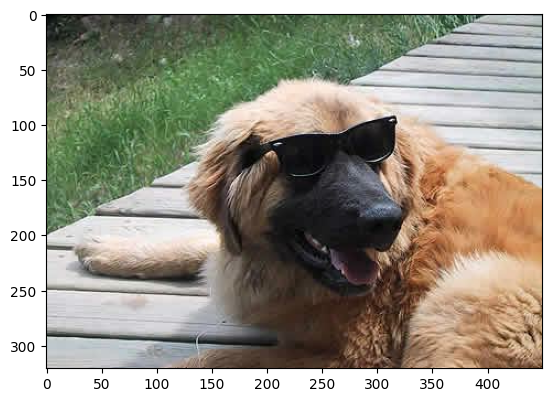

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
# flip_image = __import__('0-flip').flip_image

tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(0)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(flip_image(image))
    plt.show()

# 1. Crop

In [ ]:
#!/usr/bin/env python3
"""
1. Crop
"""
import tensorflow as tf


def crop_image(image, size):
    """function that performs a random crop of an image"""
    return tf.image.random_crop(image, size)


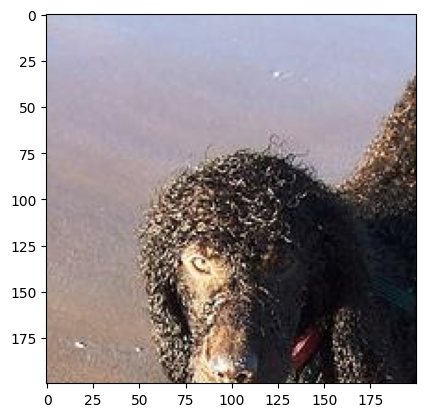

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
# crop_image = __import__('1-crop').crop_image

tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(1)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(crop_image(image, (200, 200, 3)))
    plt.show()

# 2. Rotate

In [ ]:
#!/usr/bin/env python3
"""
2. Rotate
"""
import tensorflow as tf


def rotate_image(image):
    """function that rotates an image by 90 degrees counter-clockwise"""
    return tf.image.rot90(image)


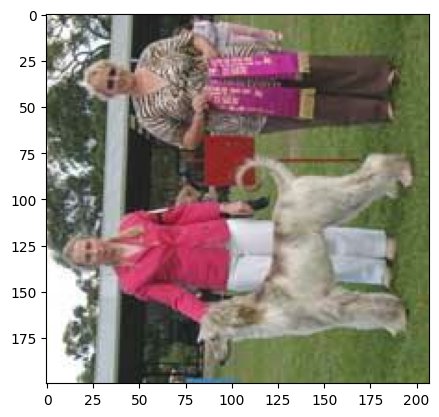

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
# rotate_image = __import__('2-rotate').rotate_image

tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(2)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(rotate_image(image))
    plt.show()

# 3. Shear

In [ ]:
#!/usr/bin/env python3
"""
3. Shear
"""
import tensorflow as tf


def shear_image(image, intensity):
    """function that randomly shears an image"""
    image = tf.keras.preprocessing.image.img_to_array(image)
    temp = tf.keras.preprocessing.image.random_shear(image,
                                                     intensity,
                                                     row_axis=0,
                                                     col_axis=1,
                                                     channel_axis=2)
    return tf.keras.preprocessing.image.array_to_img(temp)


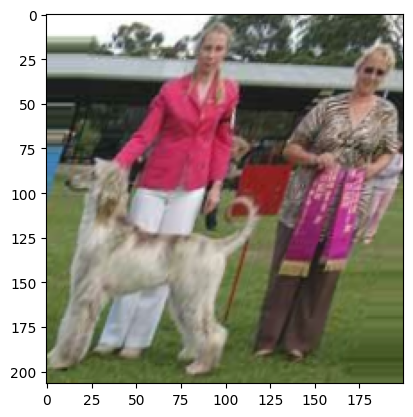

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
# shear_image = __import__('3-shear').shear_image

tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(3)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(shear_image(image, 50))
    plt.show()

# 4. Brightness

In [ ]:
def change_brightness(image, max_delta):
    """function that randomly changes the brightness of an image"""
    return tf.image.random_brightness(image,
                                      max_delta)

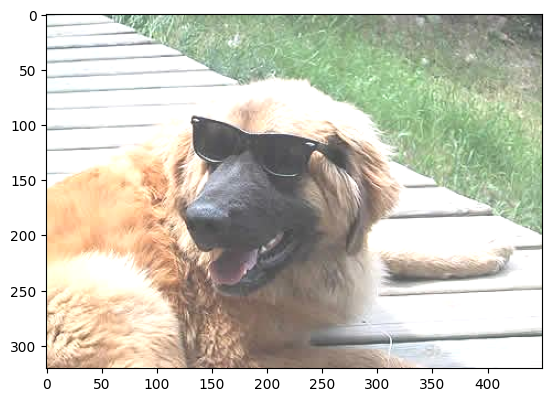

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
# change_brightness = __import__('4-brightness').change_brightness

tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(4)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(change_brightness(image, 0.3))
    plt.show()

# 5. Hue

In [ ]:
def change_hue(image, delta):
    """function that changes the hue of an image"""
    return tf.image.adjust_hue(image, delta)


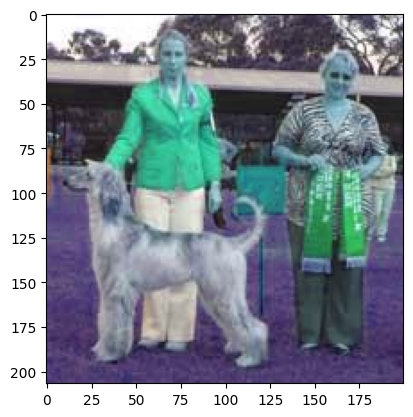

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
# change_hue = __import__('5-hue').change_hue

tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(5)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(change_hue(image, -0.5))
    plt.show()

# 7. PCA Color Augmentation

In [ ]:
def pca_color(image, alphas):
    # Convertir la imagen a float32
    image = tf.cast(image, tf.float32)

    # Redimensionar la imagen a un vector 2D
    image_reshaped = tf.reshape(image, (-1, 3))

    # Calcular la media
    mean = tf.reduce_mean(image_reshaped, axis=0)

    # Centrar los datos restando la media
    image_centered = image_reshaped - mean

    # Calcular la matriz de covarianza
    cov = tf.matmul(image_centered, image_centered, transpose_a=True) / tf.cast(tf.shape(image_centered)[0], tf.float32)

    # Calcular los eigenvectores y eigenvalores de la matriz de covarianza
    e, v = tf.linalg.eigh(cov)

    # Crear una matriz con los alphas y los eigenvalores
    alpha_lambda = tf.math.multiply(alphas, tf.sqrt(e))

    # Calcular el cambio de color
    delta = tf.tensordot(v, alpha_lambda, axes=1)

    # Añadir el cambio de color a la imagen original
    image_augmented = image + delta

    # Asegurarse de que los valores de los píxeles estén en el rango correcto
    image_augmented = tf.cast(tf.clip_by_value(image_augmented, 0, 255), dtype=tf.int32)

    return image_augmented


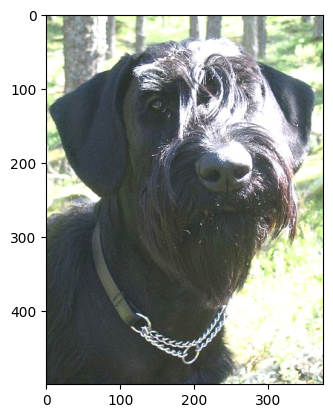

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
# pca_color = __import__('100-pca').pca_color

tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(100)
np.random.seed(100)
doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    alphas = np.random.normal(0, 0.1, 3)
    plt.imshow(pca_color(image, alphas))
    plt.show()